In [45]:
from IPython.display import display, HTML
from datetime import datetime

# Define the notebook title
Notebook_title = "Matplotlib"

# Get the current date
current_date = datetime.now().strftime("%B %d, %Y")

# Create the HTML string with title, date, and author
html_content = f"""
<h1 style="text-align:center;">{Notebook_title}</h1>
<br/>
<h3 style="text-align:left;">MikiasHWT</h3>
<h3 style="text-align:left;">{current_date}</h3>
"""

# Display the HTML content in the output
display(HTML(html_content))


# Prep Workplace

## Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os 

# To show multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Directories

In [47]:
# Directories = {
#     "datDir": "path/",
#     "outDir": "path/"
# }

# # Data Directory
# datDir = ""

# # View data
# os.listdir(datDir)

# # Output Directory
# outDir = ""

# # View outputs
# os.listdir(outDir)

# # Define required directories
# Directories = {
#     "datDir": "path/to/data",
#     "outDir": "path/to/output"
# }

# # Create directories (if they don't exist) & list contents
# for folder, path in Directories.items():
#     os.makedirs(path, exist_ok=True) 
#     print(f"Contents of {path}:")
#     print("\n".join(os.listdir(path))) 

# Styles

Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.

In [48]:
# Set style
plt.style.use('ggplot')

mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## General Tips

### Plotting from a script

```plt.show()``` starts an even loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figures. 

For example: 
```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

**Note**: the ``plt.show()`` command should be used *only once* per Python session, at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

### Plotting from an iPython shell

**Specify Matplotlib mode.**
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

### Plotting from iPhython Notebook

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

This only needs to be done once per kernel/session.

In [49]:
%matplotlib notebook

import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

<IPython.core.display.Javascript object>

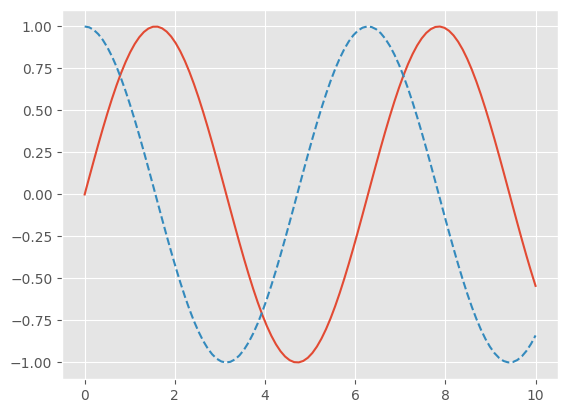

In [50]:
%matplotlib inline

import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures

**Note:** Its not necessary to use ``plt.show()`` or related commands when saving figures

In [51]:
# # Save as PNG
# fig.savefig('my_figure.png')

# # call figure 
# !ls -lh my_figure.png

# # Diplay contents of figure
# from IPython.display import Image
# Image('my_figure.png')

In [52]:
# supported file formats
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

### Interface styles

a convenient MATLAB-style state-based interface

and a more powerful object-oriented interface.


#### MATLAB-style interface
The MATLAB-style tools are contained in the pyplot (``plt``) interface.

**Note** that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

This is conveniant but can get bothersome to modify an upstream plot when needed. 

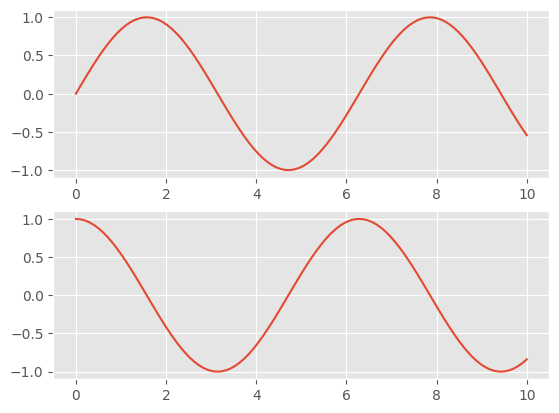

In [53]:
plt.figure()  # Create a plot figure

# Create the first of two panels and set current axis
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# Create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### Object-oriented interface

Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.

This offers more control for complicated figure development

For more simple plots, the choice of which style to use is largely a matter of preference.

In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``.

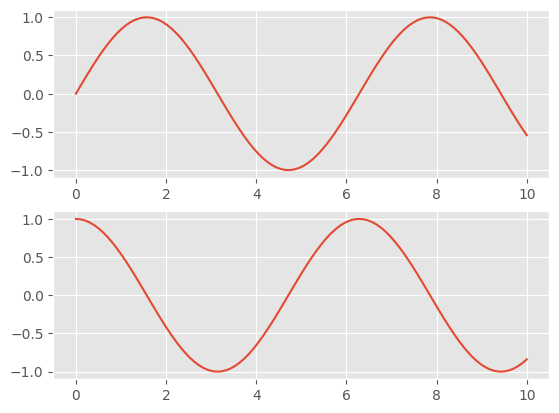

In [54]:
# Create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Line Plot
$y = f(x)$

In [55]:
# Set-up notebook (note sure of inline specification is required anymore)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [56]:
# Create a figure, fig (instance of class plt.Figure)
# single container with all objects representing axes, graphics, text and labels
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

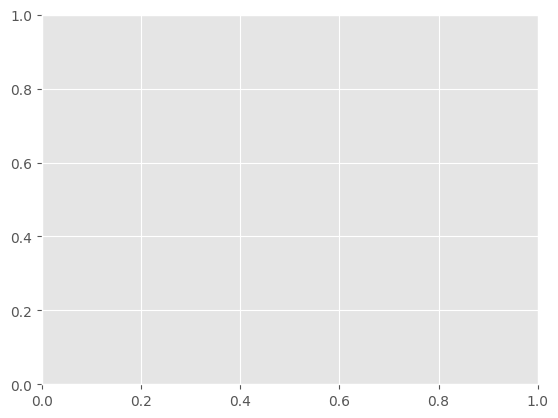

In [57]:
# Create an axes, ax (instance of class plt.Axes)
# a bounding box with ticks and labels
ax = plt.axes()

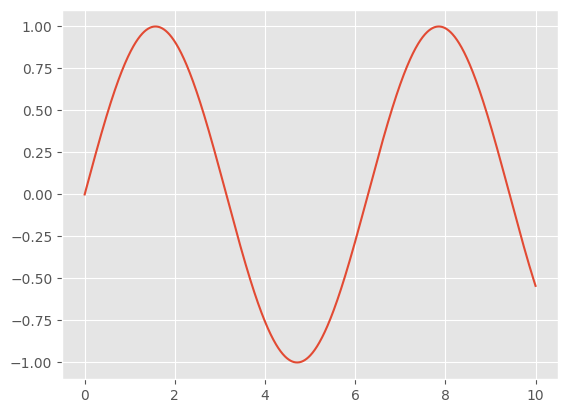

In [58]:
# Create figure and axes
fig = plt.figure()
ax = plt.axes()

# use ax.plot to plot some data
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

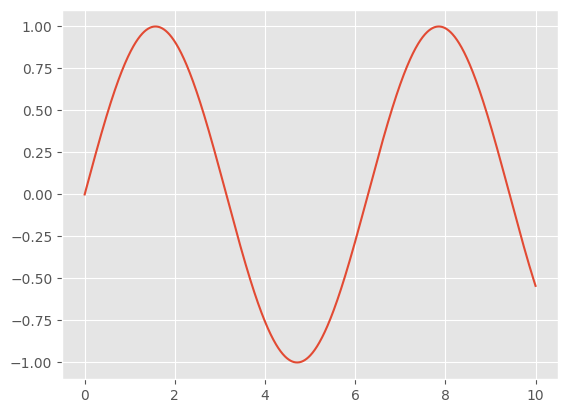

In [59]:
# Alternatively create using pylab interface
plt.plot(x, np.sin(x));

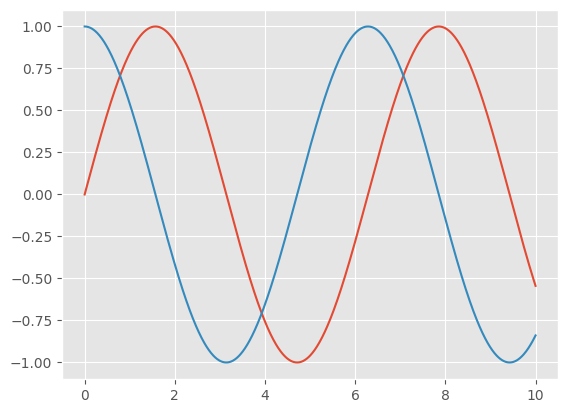

In [60]:
# to create a single figure with two lines, call plot twice
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Line Colors and Styles

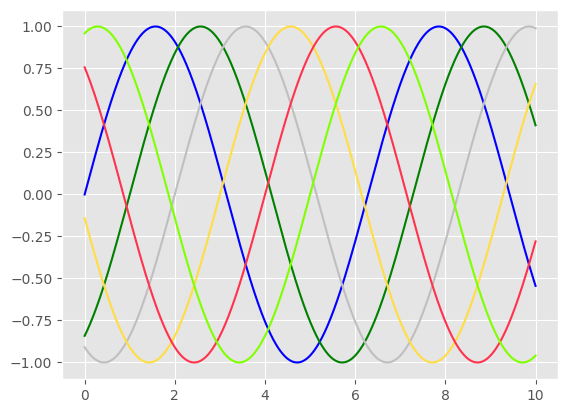

In [61]:
# Specify color various ways
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

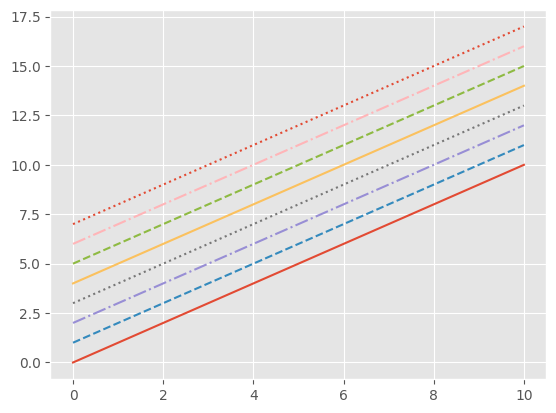

In [62]:
# Specify lines style various ways
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

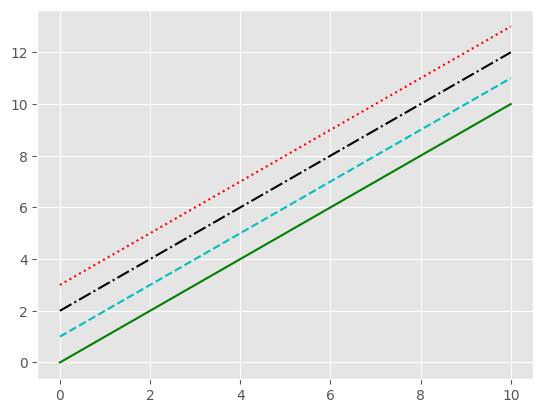

In [63]:
# Codes can be combined into a single non-keyword argument 
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## Axes Limits

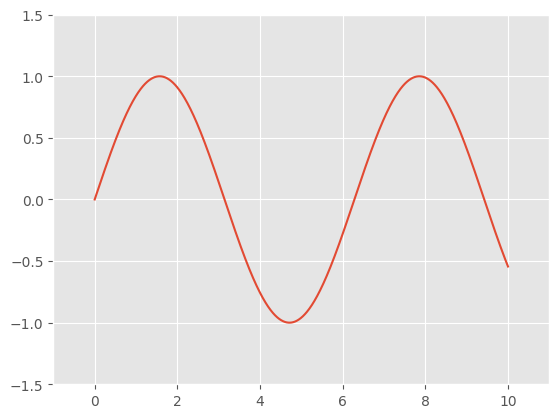

In [64]:
plt.plot(x, np.sin(x))

# Shift x & y limits
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``

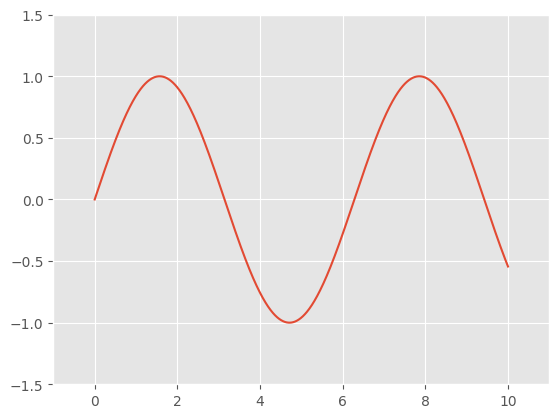

In [65]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

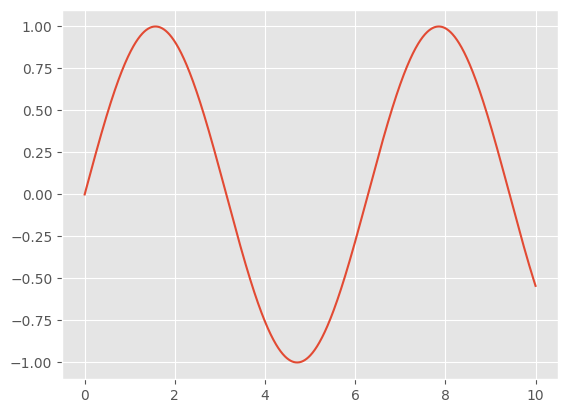

In [66]:
# Automatically tighten the bounds around the plot
plt.plot(x, np.sin(x))
plt.axis('tight');

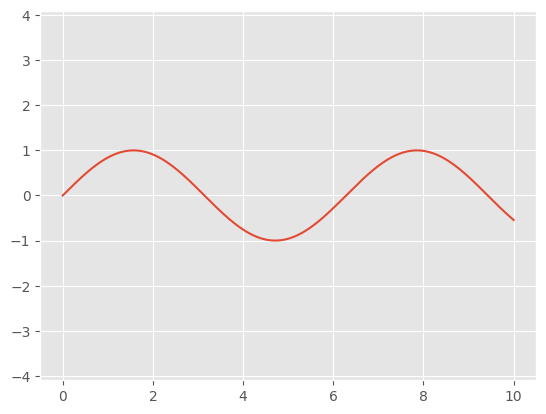

In [67]:
# Specify square aspect ratio
plt.plot(x, np.sin(x))
plt.axis('equal');

## Labeling plots

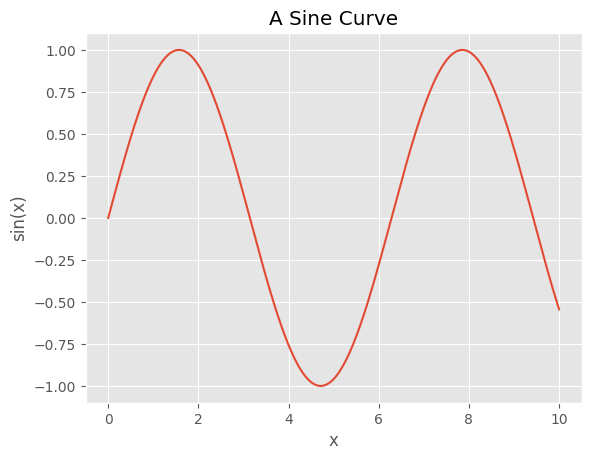

In [68]:
# Titles and axis labels
plt.plot(x, np.sin(x))
plt.title('A Sine Curve')
plt.xlabel("x")
plt.ylabel("sin(x)");

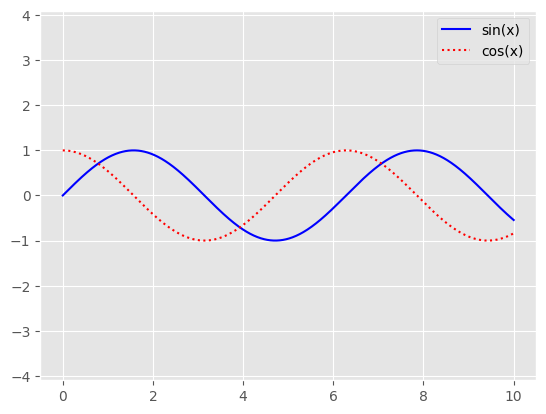

In [69]:
# legend/line labels
plt.plot(x, np.sin(x), '-b', label='sin(x)')
plt.plot(x, np.cos(x), ':r', label='cos(x)')
plt.axis('equal')

plt.legend();

## Interface differences
most ``plt`` functions translate directly to ``ax`` methods. 

ie:
- ``plt.plot()`` → ``ax.plot()``
- ``plt.legend()`` → ``ax.legend()``, etc.), 

but not all commands.

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``


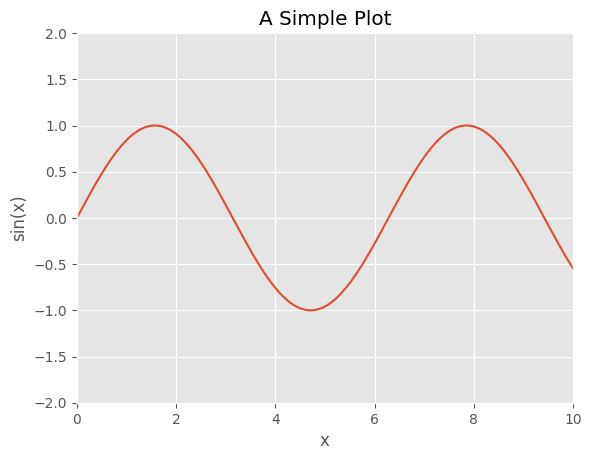

In [70]:
# Show differences
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), 
       xlabel='x', ylabel='sin(x)', 
       title='A Simple Plot');

# Scatter Plot

## ```plt.plot```

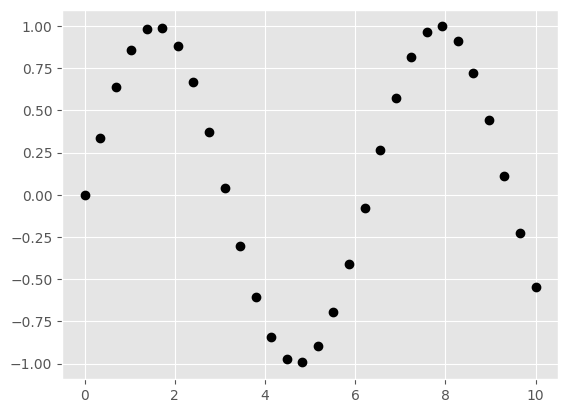

In [71]:
# plot sine curve as scatter. Specify points
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

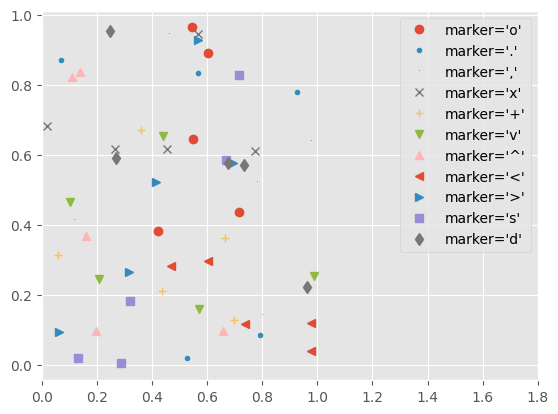

In [72]:
# Plot various point types
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

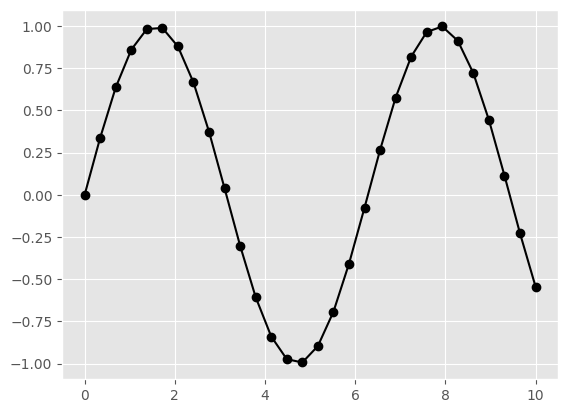

In [73]:
# Combine line and points
plt.plot(x, y, '-ok');

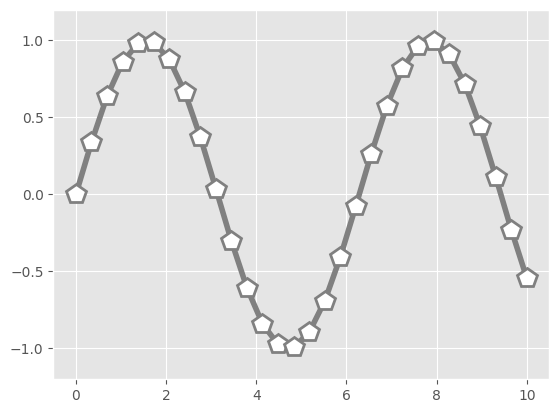

In [74]:
# show additional arguements
plt.plot(x, y, '-p', color='gray', 
         markersize=15, linewidth=4, 
         markerfacecolor='white', 
         markeredgecolor='gray', 
         markeredgewidth=2)

plt.ylim(-1.2, 1.2);

## ```plt.scatter```

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

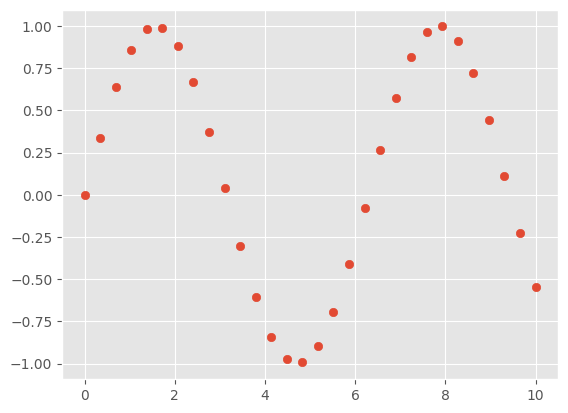

In [75]:
# Sine curve with scatter plot specifically
plt.scatter(x, y, marker='o')

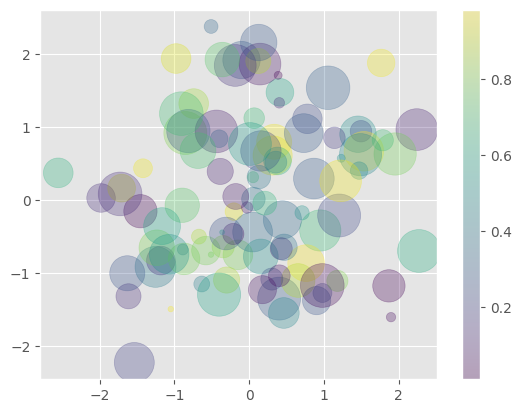

In [76]:
# Variable plot aesthetics
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [77]:
import sklearn
from sklearn import datasets
from sklearn.datasets import load_iris

# Plot Iris dataset 
iris = load_iris()
features = iris.data.T

type(iris)
iris.keys() #show all the keys
iris.get('feature_names') # column names
iris.target_names # species of flower

sklearn.utils._bunch.Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

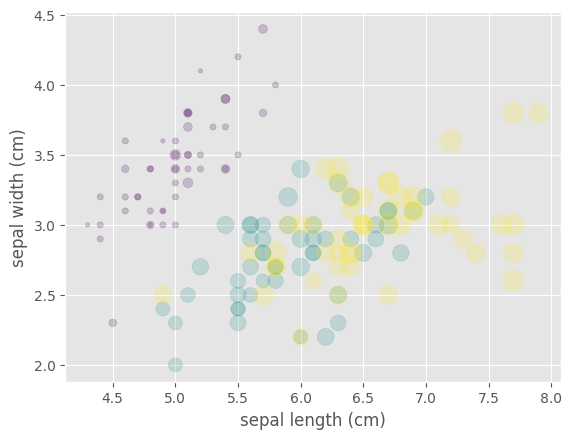

In [78]:
# Plot 4 dimensions of data using scatter
plt.scatter(features[0], features[1], # sepal length by width
            alpha=0.2, s=100*features[3], # petal width
            c=iris.target, # flower species
            cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

# Difficult to add legend for color and size

In [79]:
# # Conver to DF for visualization
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  

# # Add the species column (target values mapped to species names)
# iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# iris_df.head()
# # Plot 4 dimensions of data using scatter
# scatter = plt.scatter(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"],  
#                       alpha=0.6, s=100 * iris_df["petal width (cm)"],  # petal width for size
#                       c=iris_df["species"].cat.codes,  # flower species for color, converted to numeric
#                       cmap='viridis')

# # Labels for axes
# plt.xlabel("sepal length (cm)")
# plt.ylabel("sepal width (cm)")

# # Add color bar for species
# cbar = plt.colorbar(scatter)
# cbar.set_label('Species (encoded)')

# # Manually create a size legend for the petal width
# sizes = [1, 2, 3]  # example sizes in petal width
# for size in sizes:
#     plt.scatter([], [], s=100*size, c='gray', alpha=0.6, label=f'Petal Width: {size} cm')

# # Add the size legend to the plot
# plt.legend(title="Petal Width (cm)", loc="upper right", bbox_to_anchor=(1.15, 1));

For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

# Errorbars

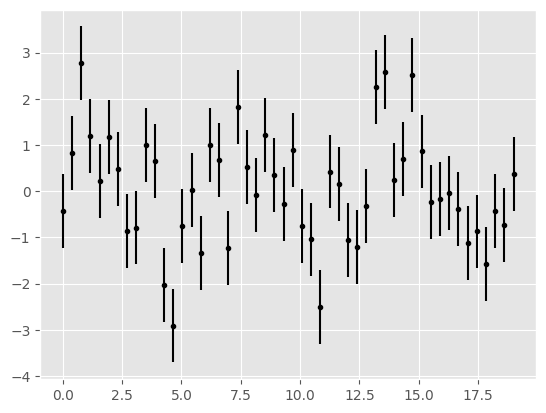

In [80]:
# plot sine curve scatter plot with error bars
x = np.linspace(0, 19, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, 
            yerr=dy, # error bar
            fmt='.k'); # appearance of line and point

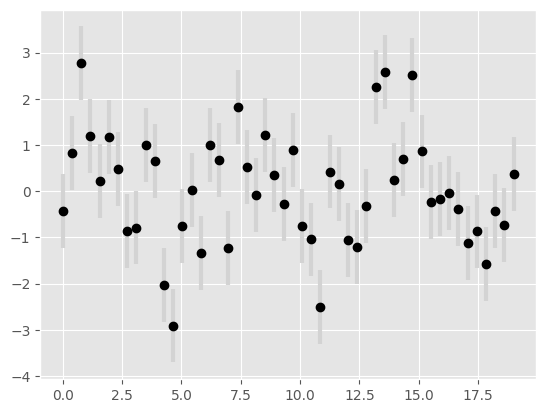

In [81]:
# Additional aestetics
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', 
             elinewidth=3, 
             capsize=0);

can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.

## Continuious Error
No built in Matplotlib functions for this, but are able to combine ```plt.plot``` and ```plt.fill_between``` for a useful result. 

# Density & Contour plots

``plt.contour`` for contour 

``plt.contourf`` for filled contour plots

``plt.imshow`` for showing images

Create contour plot using a function $z = f(x, y)$

In [86]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

 ``plt.contour`` function takes three arguments: 
 - a grid of *x* values, 
 - a grid of *y* values, and 
 - grid of *z* values.

The *x* and *y* values represent positions on the plot, 
and the *z* values will be represented by the contour levels.

The ``np.meshgrid`` function builds two-dimensional grids from one-dimensional arrays:

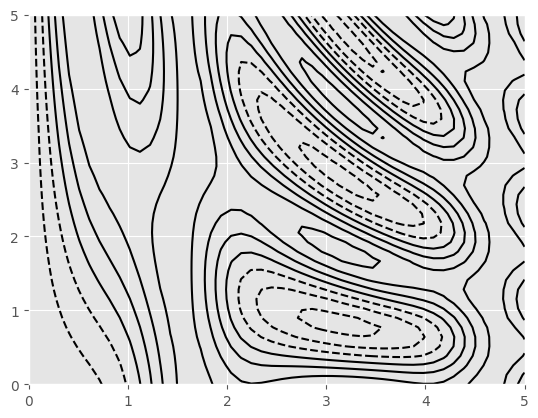

In [92]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors="black");

by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.

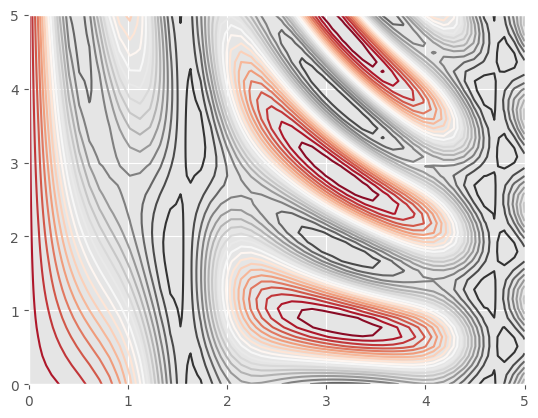

In [93]:
# Specify 20 equally spaced interval lines
plt.contour(X, Y, Z, 20, cmap="RdGy"); # Red-Gray colormap

Filled contour plot using the ``plt.contourf()`` function.

add a ``plt.colorbar()`` command for axis with labeled color information for the plot:

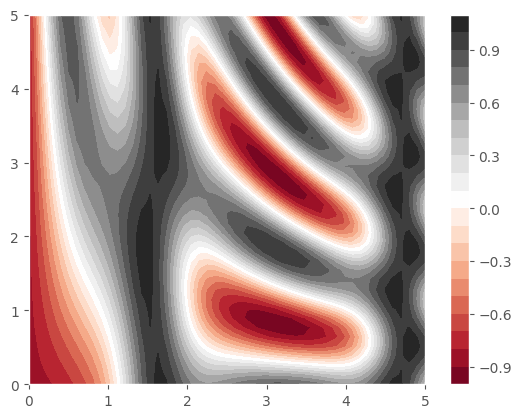

In [94]:
plt.contourf(X, Y, Z, 20, cmap="RdGy")
plt.colorbar();

use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

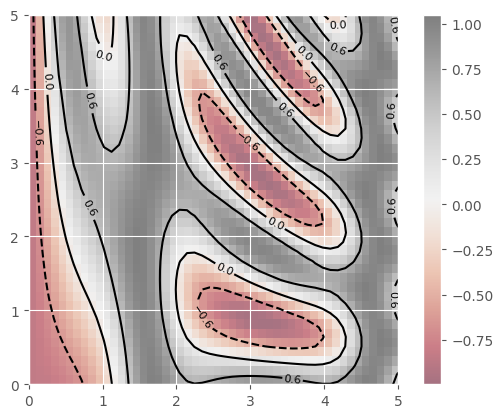

In [100]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

# Histograms, Binning and Density

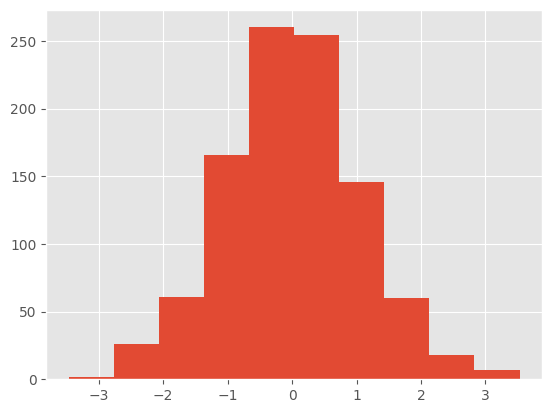

In [102]:
# Creat data & plot histogram
data = np.random.randn(1000)

plt.hist(data);

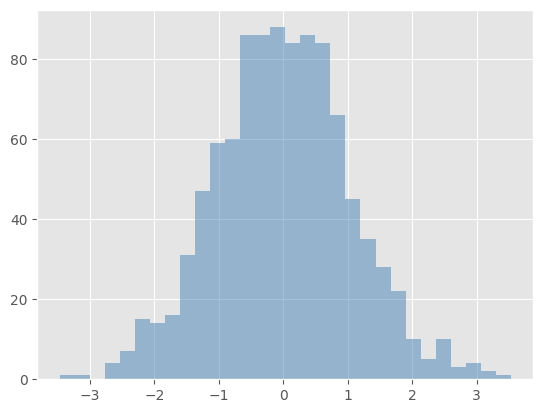

In [106]:
# Customized histogram
plt.hist(data, bins=30, alpha=0.5, 
         histtype='stepfilled', color='steelblue', 
         edgecolor='none');

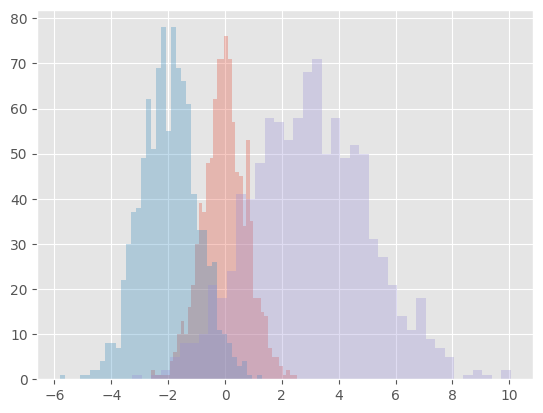

In [105]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

# Legends

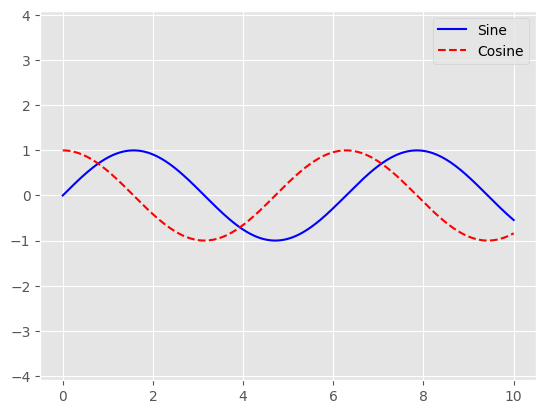

In [108]:
# specify legends
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

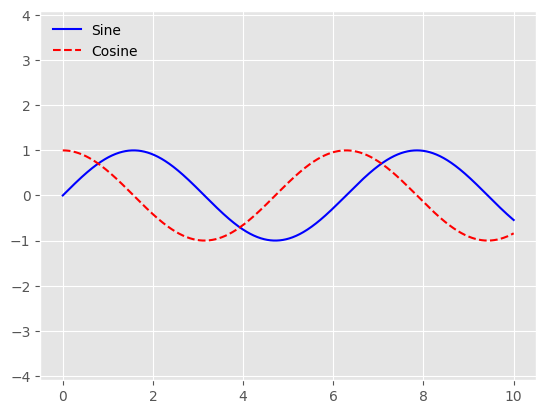

In [112]:
# Spefiy location & remove frame
ax.legend(loc='upper left', frameon=False)
fig

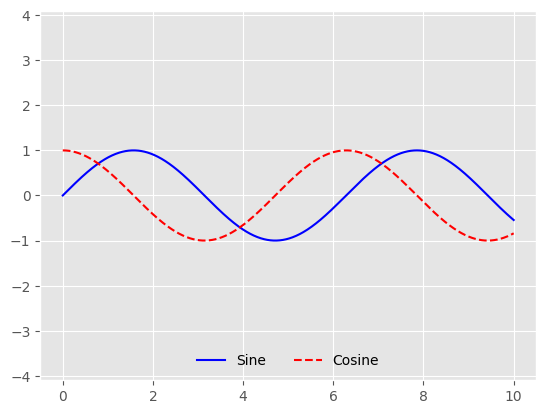

In [114]:
# specify number of columns
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

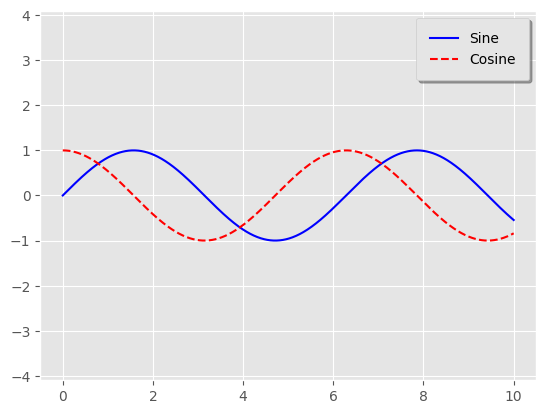

In [115]:
# Fancybox
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

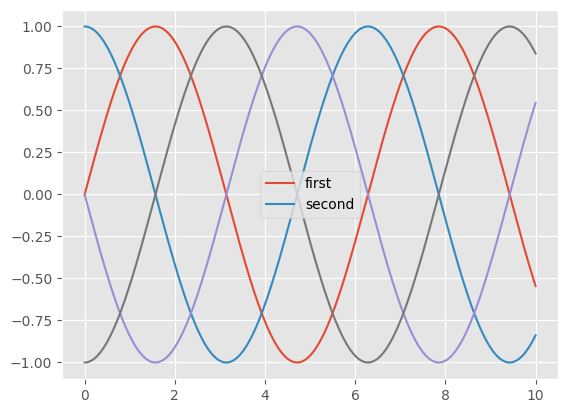

In [116]:
# specify subset of lines to label in legend
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

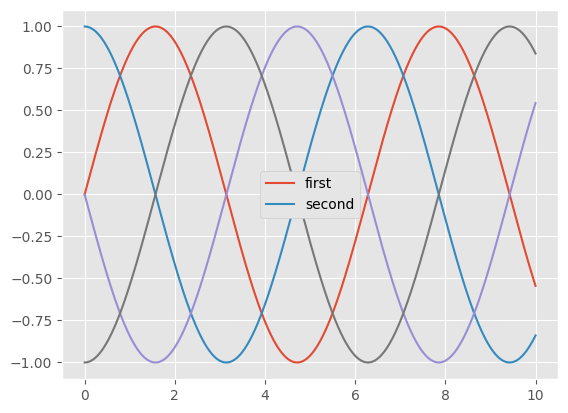

In [117]:
# Alternatively
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

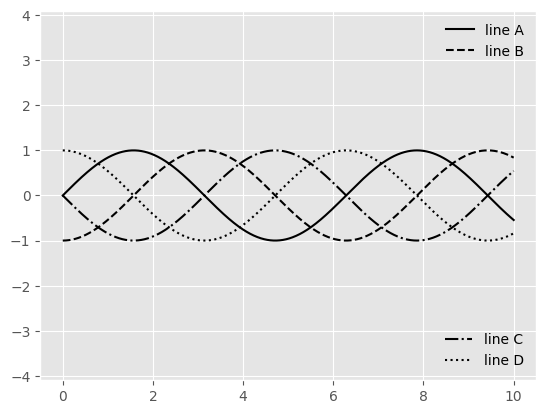

In [119]:
# Multiple legneds
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

# End

## Show Session Information

In [82]:
import session_info
session_info.show()

## Save Session Requirements

In [83]:
# Replace spaces in notebook title with underscores
filename = Notebook_title.replace(" ", "_") + "_requirements.txt"

# Run the pip freeze command and save the output txt file
!pip freeze > $filename